In [10]:
# test connection to github

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays-fall-2018/sample_submission.csv.zip
/kaggle/input/flight-delays-fall-2018/flight_delays_train.csv.zip
/kaggle/input/flight-delays-fall-2018/flight_delays_test.csv.zip


## Import ...

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 

from sklearn.datasets import make_classification

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing

from sklearn.calibration import CalibrationDisplay

## Load data from csv file in input folder

In [11]:
df_train = pd.read_csv('/kaggle/input/flight-delays-fall-2018/flight_delays_train.csv.zip')
df_test = pd.read_csv('/kaggle/input/flight-delays-fall-2018/flight_delays_test.csv.zip')

## pre treatment 

In [12]:
# Month, DayofMonth, DayOfWeek
cols = ['Month', 'DayofMonth', 'DayOfWeek']
for col in cols:
    df_train[col] = df_train[col].apply(lambda x: int(x.replace('c-', '')))
    df_test[col] = df_test[col].apply(lambda x: int(x.replace('c-', '')))

In [13]:
# DepTime
df_train['hour'] = df_train['DepTime'].apply(lambda x: x//100)
df_train['minute'] = df_train['DepTime'].apply(lambda x:  x - 100 * (x//100) )

df_test['hour'] = df_test['DepTime'].apply(lambda x: x//100)
df_test['minute'] = df_test['DepTime'].apply(lambda x:  x - 100 * (x//100) )

In [14]:
# from sklearn import preprocessing

carrier_le = preprocessing.LabelEncoder()
carrier_le.fit(pd.concat([df_train['UniqueCarrier'], df_test['UniqueCarrier']]))
print( carrier_le.classes_ )
df_train['UniqueCarrier'] = carrier_le.transform(df_train['UniqueCarrier'])
df_test['UniqueCarrier'] = carrier_le.transform(df_test['UniqueCarrier'])

['9E' 'AA' 'AQ' 'AS' 'B6' 'CO' 'DH' 'DL' 'EV' 'F9' 'FL' 'HA' 'HP' 'MQ'
 'NW' 'OH' 'OO' 'TZ' 'UA' 'US' 'WN' 'XE' 'YV']


In [15]:
#df_test['Dest']
df_test['Origin']

0        MRY
1        LAS
2        GSP
3        BWI
4        ORD
        ... 
99995    CRP
99996    ORD
99997    ORD
99998    LGA
99999    MKE
Name: Origin, Length: 100000, dtype: object

In [18]:
categ = ['Origin','Dest']
# Encode Categorical Columns
airport_le = preprocessing.LabelEncoder()
airport_le.fit(df_train['Origin'])
airport_le.fit(df_train['Dest'])
airport_le.fit(df_test['Origin'])
airport_le.fit(df_test['Dest'])
df_train[categ] = df_train[categ].apply(airport_le.fit_transform)
df_test[categ] = df_test[categ].apply(airport_le.fit_transform)
print( airport_le.classes_ )

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [19]:
'''
categ = ['Origin','Dest']
# Encode Categorical Columns
airport_le = preprocessing.LabelEncoder()
#airports = pd.concat([df_train['Origin'], df_test['Origin'], df_train['Dest'], df_test['Dest']]))
#airport_le.fit(airports)
df_train[categ] = df_train[categ].apply(airport_le.fit_transform)
print( aiport_le.classes_ )
'''

"\ncateg = ['Origin','Dest']\n# Encode Categorical Columns\nairport_le = preprocessing.LabelEncoder()\n#airports = pd.concat([df_train['Origin'], df_test['Origin'], df_train['Dest'], df_test['Dest']]))\n#airport_le.fit(airports)\ndf_train[categ] = df_train[categ].apply(airport_le.fit_transform)\nprint( aiport_le.classes_ )\n"

In [20]:
df_train[['dep_delayed_15min']].value_counts()

dep_delayed_15min
N                    80956
Y                    19044
dtype: int64

## Split train set into two dataset for trainning and validation

In [21]:
# Split with pandas ...
# part_70 = df_train.sample(frac = 0.7)
# rest_part_30 = df_train.drop(part_70.index)
# print (len(df_train), len(part_70), len(rest_part_30))

# Split arrays or matrices into random train and test subsets.
#  sklearn.model_selection.train_test_split(*arrays, test_size=None, 
#      train_size=None, random_state=None, shuffle=True, stratify=None)[source]

# from sklearn.model_selection import train_test_split
cols = ['Month', 'DayofMonth', 'DayOfWeek',
        'UniqueCarrier','Origin', 'Dest', 'Distance',
        'hour', 'minute'
       ]
X = df_train[cols]
y = df_train['dep_delayed_15min']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)

df_test = df_test[cols]

In [22]:
print(type(y_train))

#print ('y_train', np.count_nonzero(y_train == 1), 
#       'N', np.count_nonzero(y_train == 0))
y_train.value_counts()

<class 'pandas.core.series.Series'>


N    54241
Y    12759
Name: dep_delayed_15min, dtype: int64

In [23]:
# Standardize features by removing the mean and scaling to unit variance.
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
print(scaler.mean_)


[  6.54692537  15.71538806   3.94925373  13.03677612 142.41785075
 140.97049254 729.43852239  13.135       29.61147761]


## last filter for columns ...

In [ ]:
## test
cols = ['Month', 'DayofMonth', 'DayOfWeek',
        'UniqueCarrier','Origin', 'Dest', 'Distance',
        'hour', 'minute'
       ]
X = df_train[cols]
Y = df_train['dep_delayed_15min']


## Test LogisticRegression

In [40]:
score = []
final = []
kfold = StratifiedKFold(n_splits=10, random_state=24, shuffle=True)

for Train, Test in kfold.split(X,Y):
    X_train, X_test = X.iloc[Train], X.iloc[Test]
    Y_train, Y_test = Y.iloc[Train], Y.iloc[Test]
    
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(X_train, Y_train)
    
    y_test_predict = pipe.predict_proba(X_train)
    roc = roc_auc_score(Y_test, final_predict[:,1])
    print(roc)
    score.append(roc)
    final.append(final_predict[:,1])
average_score = np.mean(score)
print('The average roc is ', average_score)

0.6730489379546285
0.5025404832140367
0.4962321236547979
0.5094239400305576
0.49302624026389213
0.4960030578436908
0.4936988095759185
0.49401733677669535
0.49263888956437585
0.484419175830322
The average roc is  0.5135048994708915


# Test Random Forest

In [61]:
score = []
final = []
kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)

for Train, Test in kfold.split(X,Y):
    X_train, X_test = X.iloc[Train], X.iloc[Test]
    Y_train, Y_test = Y.iloc[Train], Y.iloc[Test]
    
    pipe = make_pipeline(StandardScaler(), 
                        RandomForestClassifier())
                        
    pipe.fit(X_train, Y_train)    
    y_test_predict = pipe.predict_proba(X_test)    
    
    roc = roc_auc_score(Y_test, y_test_predict[:,1])
    print(roc)
    score.append(roc)
average_score = np.mean(score)
print('The average roc is ', average_score)

0.7310392493984995
0.7341872185765361
0.7309340556375787
0.7344947754570469
0.7367813576960865
The average roc is  0.7334873313531496


In [60]:
score = []
final = []
kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)

for Train, Test in kfold.split(X,Y):
    X_train, X_test = X.iloc[Train], X.iloc[Test]
    Y_train, Y_test = Y.iloc[Train], Y.iloc[Test]
    
    pipe = make_pipeline(StandardScaler(), 
                        GaussianNB())
                        
    pipe.fit(X_train, Y_train)    
    print (pipe.score(X_test, Y_test))
    y_test_predict = pipe.predict_proba(X_test)    
    #print (y_test_predict[:,1])
    roc = roc_auc_score(Y_test, y_test_predict[:,1])
    print(roc)
    score.append(roc)
average_score = np.mean(score)
print('The average roc is ', average_score)

0.8098
0.6778185474412097
0.80975
0.6804192223642165
0.80965
0.6849817822713269
0.8097
0.685929918476631
0.8096
0.6904132197554596
The average roc is  0.6839125380617687


In [387]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [388]:
y_prediction = clf.predict(X_test)
len(y_prediction[y_prediction == y_test])/len(y_prediction)

0.8095454545454546

In [28]:
# from sklearn.calibration import CalibrationDisplay
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
#svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    #(svc, "SVC"),
    (rfc, "Random forest"),
]

In [390]:
for i, (clf, name) in enumerate(clf_list):
    #clf.fit(X_train, y_train)
    pipe = make_pipeline(StandardScaler(), clf)
    pipe.fit(X_train, y_train)
    print (pipe.score(X_test, y_test))
    

0.8095757575757576
0.8096363636363636
0.8196060606060606


In [391]:
for i, (clf, name) in enumerate(clf_list):   
    y_prediction = clf.predict(X_test)
    print (len(y_prediction[y_prediction == y_test])/len(y_prediction))

0.18996969696969698
0.7964848484848485


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.2402121212121212


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


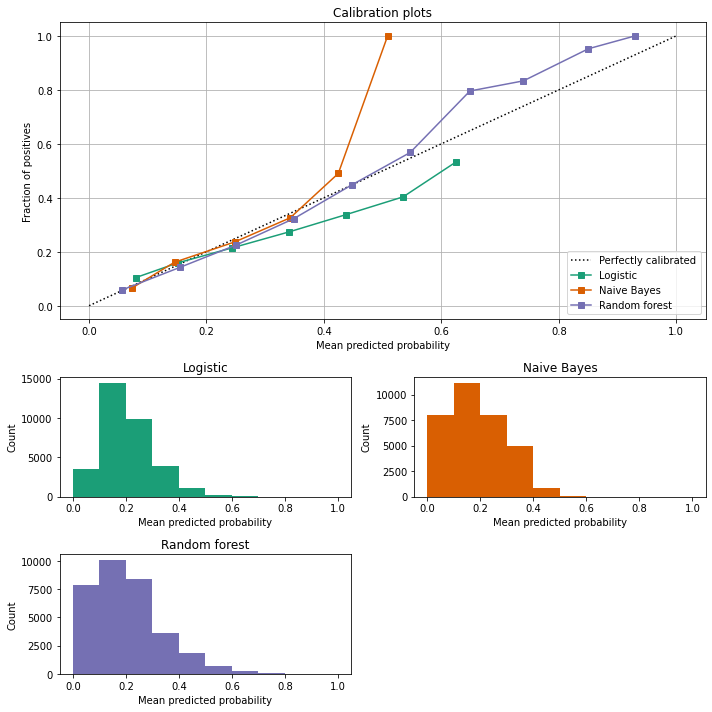

In [392]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [393]:
df_submission = pd.read_csv('/kaggle/input/flight-delays-fall-2018/sample_submission.csv.zip')
df_submission.head()

,id,dep_delayed_15min
0,0,0.081
1,1,0.387
2,2,0.069
3,3,0.177
4,4,0.732


In [394]:
pipe = make_pipeline(StandardScaler(), rfc)
pipe.fit(X_train, y_train)
prediction = pipe.predict_proba(df_test)

In [395]:
df_test['dep_delayed_15min'] = prediction[:,1]
df_test.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,hour,minute,dep_delayed_15min
0,7,25,3,22,194,217,598,6,15,0.04
1,4,17,2,20,155,129,1235,7,39,0.07
2,12,2,7,13,121,208,577,6,51,0.02
3,3,25,7,20,49,183,377,16,14,0.21
4,6,6,3,18,209,270,258,15,5,0.22


In [336]:
df_test = df_test[['dep_delayed_15min']].reset_index()
df_test.columns = ['id', 'dep_delayed_15min']
df_test.to_csv('./submission.csv', index=False)